In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from ucimlrepo import fetch_ucirepo 

bank_marketing = fetch_ucirepo(id=222) 

X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  



In [2]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [3]:
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [5]:
y.value_counts()

y  
no     39922
yes     5289
dtype: int64

In [6]:
y=y.iloc[:,0]
y=y.map({"yes":1,"no": 0})
df=pd.concat([X,y],axis=1)

In [7]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [8]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
missing_poutcome=df[df["poutcome"].isnull()]
missing_poutcome.y.value_counts()

0    33573
1     3386
Name: y, dtype: int64

In [10]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [11]:
missing_ed=df[df["education"].isnull()]
missing_ed.y.value_counts()

0    1605
1     252
Name: y, dtype: int64

In [12]:
cols=["duration"]
df.drop(columns=cols,axis=1,inplace=True)

### ⚠️ Why the `duration` Feature Should Be Avoided

The `duration` variable represents the length of the phone call in seconds. This value is only known **after** the contact with the client has taken place, meaning it contains **information from the future**.

As a result, using this feature during model training can **artificially inflate the model's performance** because:

- Long calls are often associated with successful outcomes,
- Short calls are typically linked to negative responses.

If the model learns from this feature, it behaves as if it already **knows the result in advance**. This scenario is called **data leakage**—when the model gains access to information that would not be available in real-world predictions.

> In a real-world application, the `duration` of the call is unknown before making the call. Therefore, training the model with it leads to unrealistic and misleading results.

✅ For this reason, the `duration` feature should be **excluded from model training** and used only for retrospective analysis or reporting purposes.


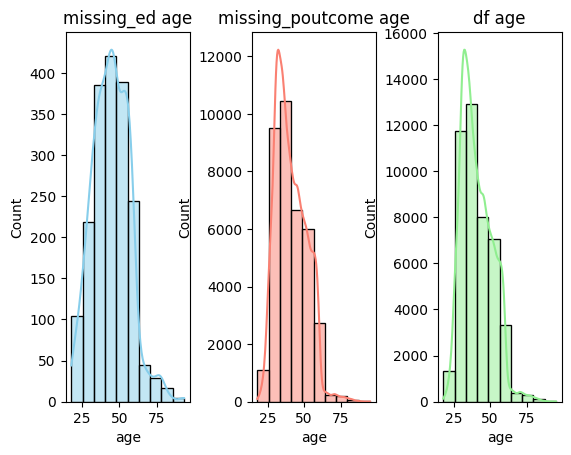

In [13]:
plt.subplot(1,3,1)
sns.histplot(data=missing_ed, x="age", bins=10, kde=True, color="skyblue")
plt.title("missing_ed age")
plt.subplot(1,3,2)
sns.histplot(data=missing_poutcome, x="age", bins=10, kde=True, color="salmon")
plt.title("missing_poutcome age")
plt.subplot(1,3,3)
sns.histplot(data=df, x="age", bins=10, kde=True, color="lightgreen")
plt.title("df age")
plt.subplots_adjust(wspace=0.5)

In [14]:
missing_ed.job.value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [15]:
missing_poutcome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36959 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          36959 non-null  int64 
 1   job          36704 non-null  object
 2   marital      36959 non-null  object
 3   education    35425 non-null  object
 4   default      36959 non-null  object
 5   balance      36959 non-null  int64 
 6   housing      36959 non-null  object
 7   loan         36959 non-null  object
 8   contact      24009 non-null  object
 9   day_of_week  36959 non-null  int64 
 10  month        36959 non-null  object
 11  duration     36959 non-null  int64 
 12  campaign     36959 non-null  int64 
 13  pdays        36959 non-null  int64 
 14  previous     36959 non-null  int64 
 15  poutcome     0 non-null      object
 16  y            36959 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.1+ MB


In [16]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [17]:
df["education"]=df["education"].fillna("unknown")

<Axes: xlabel='education', ylabel='y'>

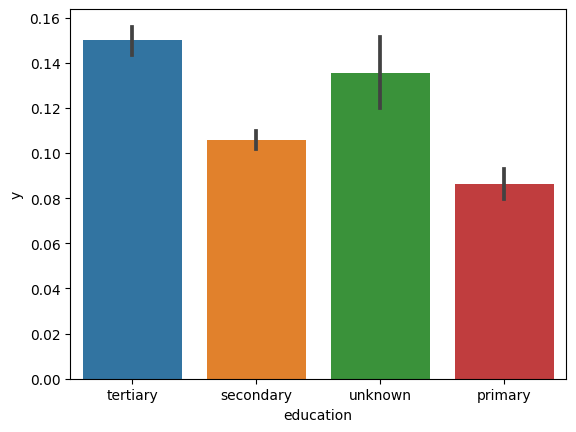

In [18]:
sns.barplot(data=df,x="education",y="y")

In [19]:
df.poutcome.value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome', ylabel='y'>

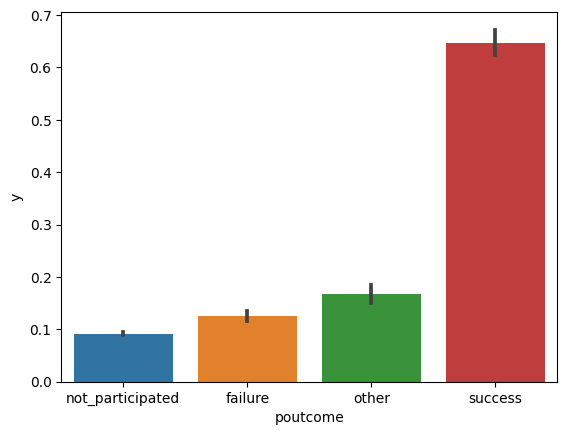

In [20]:
df["poutcome"]=df["poutcome"].fillna("not_participated")
sns.barplot(data=df,x="poutcome",y="y")


In [21]:
df["poutcome_success"]=(df["poutcome"]=="success").astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'services'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student')])

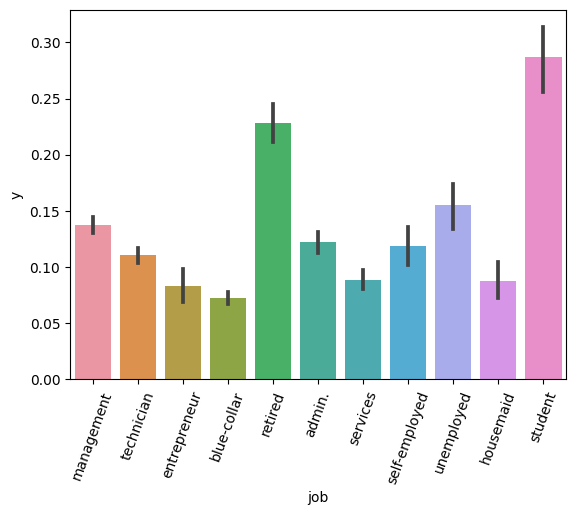

In [22]:
sns.barplot(data=df,x="job",y="y")
plt.xticks(rotation=70)

In [23]:
df["contact"]=df["contact"].fillna("unknown")
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

<Axes: xlabel='contact', ylabel='y'>

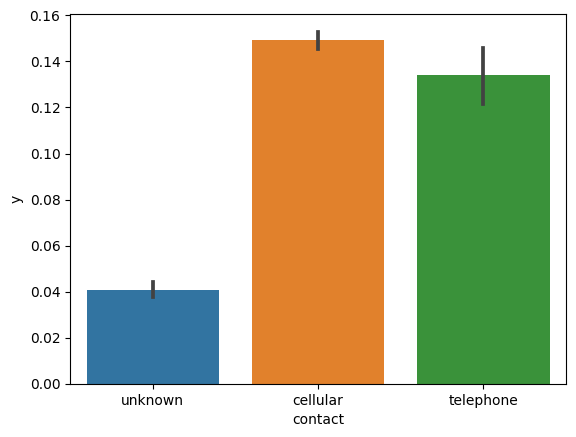

In [24]:
sns.barplot(data=df,x="contact",y="y")

In [25]:
df["contacted"]=df["contact"].apply(lambda x: 0 if x=="unknown" else 1)

In [26]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               44923 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  object
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day_of_week       45211 non-null  int64 
 10  month             45211 non-null  object
 11  campaign          45211 non-null  int64 
 12  pdays             45211 non-null  int64 
 13  previous          45211 non-null  int64 
 14  poutcome          45211 non-null  object
 15  y                 45211 non-null  int64 
 16  poutcome_success  45211 non-null  int32 
 17  contacted   

In [28]:
df.poutcome_success.value_counts()

0    43700
1     1511
Name: poutcome_success, dtype: int64

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y,poutcome_success,contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,not_participated,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,not_participated,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,not_participated,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,not_participated,0,0,0
4,33,NaN,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,not_participated,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,not_participated,1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,not_participated,1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,1,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,not_participated,0,0,1


In [30]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [31]:
df["housing"]=df["housing"].apply(lambda x: 0 if x=="no" else 1)

In [32]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='y'>

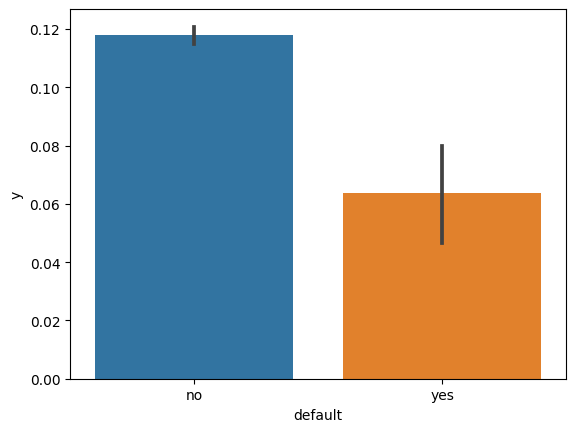

In [33]:
sns.barplot(data=df,x="default",y="y")

In [34]:
df["housing"]=df["housing"].apply(lambda x: 0 if x=="no" else 1)

In [35]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='y'>

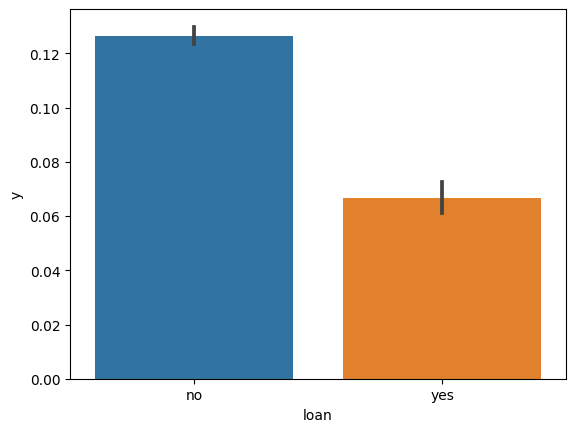

In [36]:
sns.barplot(data=df,x="loan",y="y")

In [37]:
df["loan_status"]=df["loan"].apply(lambda x: 0 if x=="no" else 1)

In [38]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y,poutcome_success,contacted,loan_status
0,58,management,married,tertiary,no,2143,1,no,unknown,5,may,1,-1,0,not_participated,0,0,0,0
1,44,technician,single,secondary,no,29,1,no,unknown,5,may,1,-1,0,not_participated,0,0,0,0
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,may,1,-1,0,not_participated,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,may,1,-1,0,not_participated,0,0,0,0
4,33,NaN,single,unknown,no,1,1,no,unknown,5,may,1,-1,0,not_participated,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,1,no,cellular,17,nov,3,-1,0,not_participated,1,0,1,0
45207,71,retired,divorced,primary,no,1729,1,no,cellular,17,nov,2,-1,0,not_participated,1,0,1,0
45208,72,retired,married,secondary,no,5715,1,no,cellular,17,nov,5,184,3,success,1,1,1,0
45209,57,blue-collar,married,secondary,no,668,1,no,telephone,17,nov,4,-1,0,not_participated,0,0,1,0


In [39]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='y'>

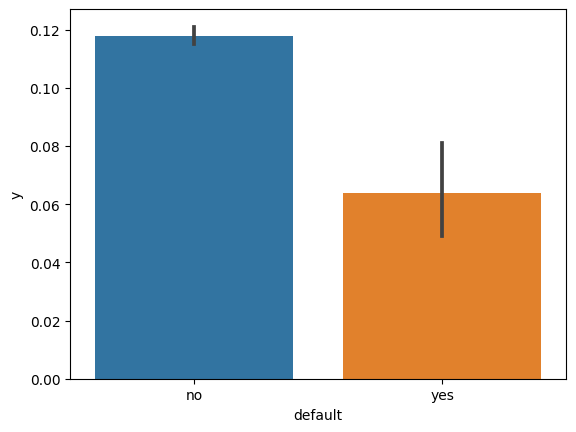

In [40]:
sns.barplot(data=df,x="default",y="y")

In [41]:
df["default_status"]=df["default"].apply(lambda x: 0 if x=="no" else 1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               44923 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  int64 
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day_of_week       45211 non-null  int64 
 10  month             45211 non-null  object
 11  campaign          45211 non-null  int64 
 12  pdays             45211 non-null  int64 
 13  previous          45211 non-null  int64 
 14  poutcome          45211 non-null  object
 15  y                 45211 non-null  int64 
 16  poutcome_success  45211 non-null  int32 
 17  contacted   

In [43]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='y'>

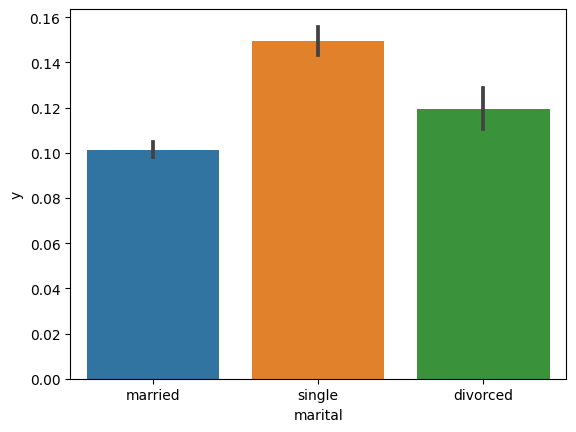

In [44]:
sns.barplot(data=df,x="marital",y="y")

In [45]:
df["marital_status"]=df["marital"].apply(lambda x: 1 if x=="married" else 0)

<Axes: xlabel='marital_status', ylabel='y'>

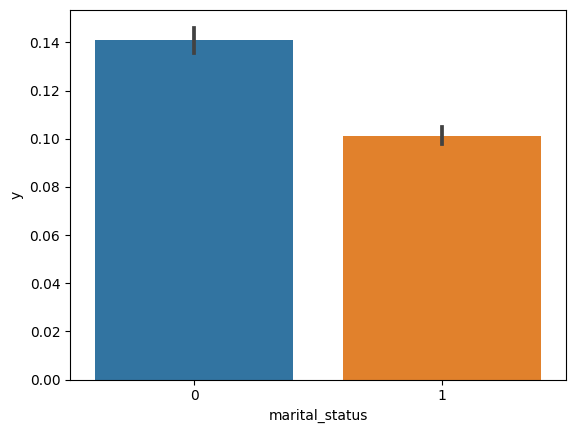

In [46]:
sns.barplot(data=df,x="marital_status",y="y")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               44923 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  int64 
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day_of_week       45211 non-null  int64 
 10  month             45211 non-null  object
 11  campaign          45211 non-null  int64 
 12  pdays             45211 non-null  int64 
 13  previous          45211 non-null  int64 
 14  poutcome          45211 non-null  object
 15  y                 45211 non-null  int64 
 16  poutcome_success  45211 non-null  int32 
 17  contacted   

In [48]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='y'>

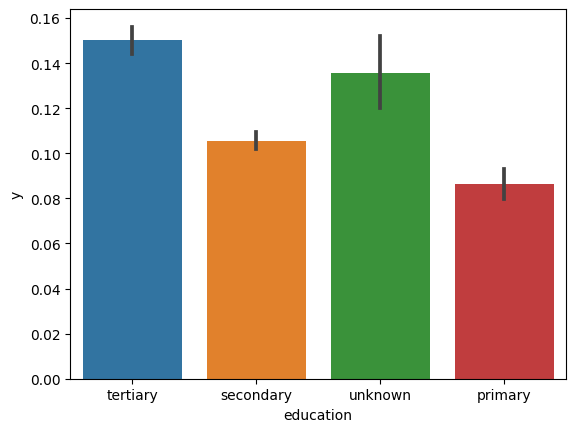

In [49]:
sns.barplot(data=df,x="education",y="y")

In [50]:
education_target_mean=df.groupby("education")["y"].mean()
df["education_target_encoded"] = df["education"].map(education_target_mean)


(array([0, 1, 2, 3]),
 [Text(0, 0, '0.08626477886439936'),
  Text(1, 0, '0.10559434531505904'),
  Text(2, 0, '0.13570274636510501'),
  Text(3, 0, '0.15006390496955116')])

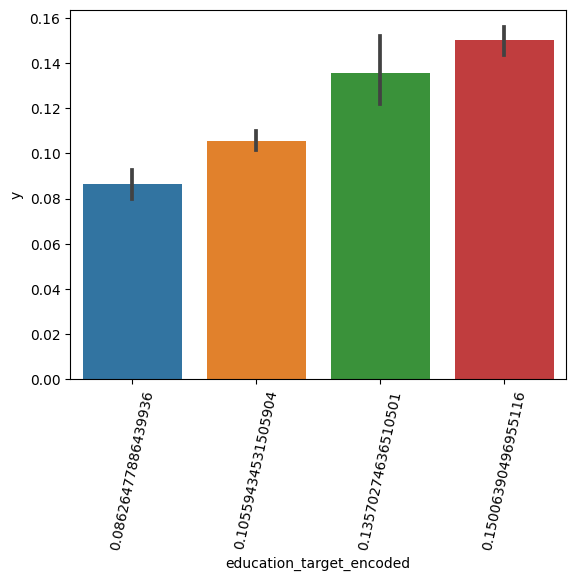

In [51]:
sns.barplot(data=df,x="education_target_encoded",y="y")
plt.xticks(rotation=78)

In [52]:
df["job"] = df["job"].fillna("unknown")

In [53]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [54]:
job_target_mean=df.groupby("job")["y"].mean()
df["job_target_encoded"] = df["job"].map(job_target_mean)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0.07274969173859433'),
  Text(1, 0, '0.08271687962340282'),
  Text(2, 0, '0.08790322580645162'),
  Text(3, 0, '0.08883004333172845'),
  Text(4, 0, '0.11056996182703699'),
  Text(5, 0, '0.11805555555555555'),
  Text(6, 0, '0.11842938568714376'),
  Text(7, 0, '0.12202668729452718'),
  Text(8, 0, '0.13755550856417847'),
  Text(9, 0, '0.15502686108979277'),
  Text(10, 0, '0.22791519434628976'),
  Text(11, 0, '0.2867803837953092')])

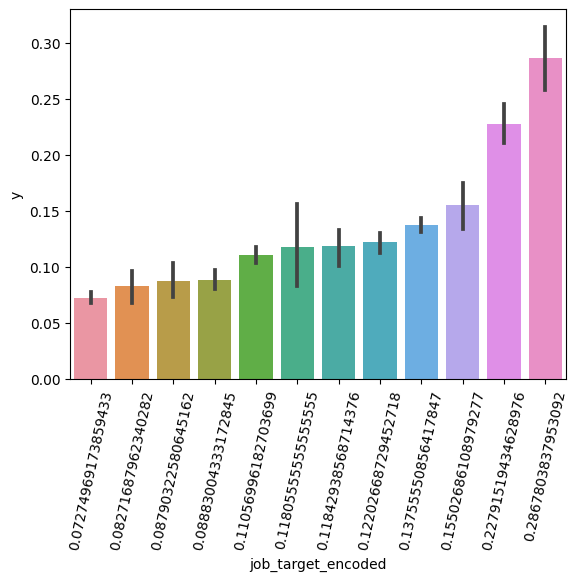

In [55]:
sns.barplot(data=df,x="job_target_encoded",y="y")
plt.xticks(rotation=78)

In [56]:
data_frame=df.copy()

In [57]:
columns=["marital","education","job","default","loan","contact","poutcome"]
data_frame.drop(columns=columns,axis=1,inplace=True)

In [58]:
data_frame.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [59]:
season_mapping={'dec': 'winter', 'jan': 'winter', 'feb': 'winter', 
                  'mar': 'spring', 'apr': 'spring', 'may': 'spring',
                  'jun': 'summer', 'jul': 'summer', 'aug': 'summer', 
                  'sep': 'fall', 'oct': 'fall', 'nov': 'fall'}
data_frame["season"]=data_frame["month"].map(season_mapping)


data_frame=pd.get_dummies(data_frame,columns=["season"],drop_first=False)

In [60]:
data_frame.drop(columns="month",axis=1,inplace=True)


In [61]:
data_frame

,age,balance,housing,day_of_week,campaign,pdays,previous,y,poutcome_success,contacted,loan_status,default_status,marital_status,education_target_encoded,job_target_encoded,season_fall,season_spring,season_summer,season_winter
0,58,2143,1,5,1,-1,0,0,0,0,0,0,1,0.150064,0.137556,0,1,0,0
1,44,29,1,5,1,-1,0,0,0,0,0,0,0,0.105594,0.110570,0,1,0,0
2,33,2,1,5,1,-1,0,0,0,0,1,0,1,0.105594,0.082717,0,1,0,0
3,47,1506,1,5,1,-1,0,0,0,0,0,0,1,0.135703,0.072750,0,1,0,0
4,33,1,1,5,1,-1,0,0,0,0,0,0,0,0.135703,0.118056,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,1,17,3,-1,0,1,0,1,0,0,1,0.150064,0.110570,1,0,0,0
45207,71,1729,1,17,2,-1,0,1,0,1,0,0,0,0.086265,0.227915,1,0,0,0
45208,72,5715,1,17,5,184,3,1,1,1,0,0,1,0.105594,0.227915,1,0,0,0
45209,57,668,1,17,4,-1,0,0,0,1,0,0,1,0.105594,0.072750,1,0,0,0


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = data_frame.drop(columns=['y'])  
y = data_frame['y']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

cv_accuracy = cross_val_score(rf_model, X, y, cv=7, scoring='accuracy')
cv_precision = cross_val_score(rf_model, X, y, cv=7, scoring='precision')
cv_recall = cross_val_score(rf_model, X, y, cv=7, scoring='recall')
cv_f1 = cross_val_score(rf_model, X, y, cv=7, scoring='f1')

print("Accuracy: ", cv_accuracy.mean())
print("Precision: ", cv_precision.mean())
print("Recall: ", cv_recall.mean())
print("F1-Score: ", cv_f1.mean())


Accuracy:  0.6113971617924632
Precision:  0.0600992346053714
Recall:  0.19237509573365769
F1-Score:  0.08509847647812475


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

random_state = 42

X = data_frame.drop(columns="y", axis=1)
y = data_frame["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2
)


cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    knn_model.fit(X_train_cv, y_train_cv)
    y_pred = knn_model.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (KNN):")
print(cv_results)
print("\nAverage Metrics:")
print(cv_results.mean())


Cross-Validation Results (KNN):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.860454   0.854673  0.868574  0.861567                13.142643
1  0.859239   0.854979  0.865208  0.860063                13.479155
2  0.863632   0.862088  0.865794  0.863937                13.420561
3  0.861669   0.858201  0.866542  0.862351                13.345794
4  0.864274   0.856281  0.875491  0.865779                12.450925

Average Metrics:
Accuracy                    0.861854
Precision                   0.857244
Recall                      0.868322
F1 Score                    0.862740
False Negative Rate (%)    13.167816
dtype: float64


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

random_state = 42


X = data_frame.drop(columns="y", axis=1)
y = data_frame["y"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)


smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_resampled)


knn_model = KNeighborsClassifier(
    n_neighbors=7,
    metric='minkowski',
    p=1.5
)


cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    knn_model.fit(X_train_cv, y_train_cv)
    y_pred = knn_model.predict(X_test_cv)


    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (KNN):")
print(cv_results)
print("\nAverage Metrics:")
print(cv_results.mean())


Cross-Validation Results (KNN):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.862043   0.864346  0.858852  0.861590                14.114788
1  0.860174   0.863422  0.855674  0.859531                14.432604
2  0.862043   0.866440  0.856075  0.861226                14.392523
3  0.865688   0.869360  0.860748  0.865032                13.925234
4  0.866424   0.864855  0.868574  0.866710                13.142643

Average Metrics:
Accuracy                    0.863274
Precision                   0.865685
Recall                      0.859984
F1 Score                    0.862818
False Negative Rate (%)    14.001559
dtype: float64


In [65]:
data_frame

,age,balance,housing,day_of_week,campaign,pdays,previous,y,poutcome_success,contacted,loan_status,default_status,marital_status,education_target_encoded,job_target_encoded,season_fall,season_spring,season_summer,season_winter
0,58,2143,1,5,1,-1,0,0,0,0,0,0,1,0.150064,0.137556,0,1,0,0
1,44,29,1,5,1,-1,0,0,0,0,0,0,0,0.105594,0.110570,0,1,0,0
2,33,2,1,5,1,-1,0,0,0,0,1,0,1,0.105594,0.082717,0,1,0,0
3,47,1506,1,5,1,-1,0,0,0,0,0,0,1,0.135703,0.072750,0,1,0,0
4,33,1,1,5,1,-1,0,0,0,0,0,0,0,0.135703,0.118056,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,1,17,3,-1,0,1,0,1,0,0,1,0.150064,0.110570,1,0,0,0
45207,71,1729,1,17,2,-1,0,1,0,1,0,0,0,0.086265,0.227915,1,0,0,0
45208,72,5715,1,17,5,184,3,1,1,1,0,0,1,0.105594,0.227915,1,0,0,0
45209,57,668,1,17,4,-1,0,0,0,1,0,0,1,0.105594,0.072750,1,0,0,0


<Axes: xlabel='balance', ylabel='Count'>

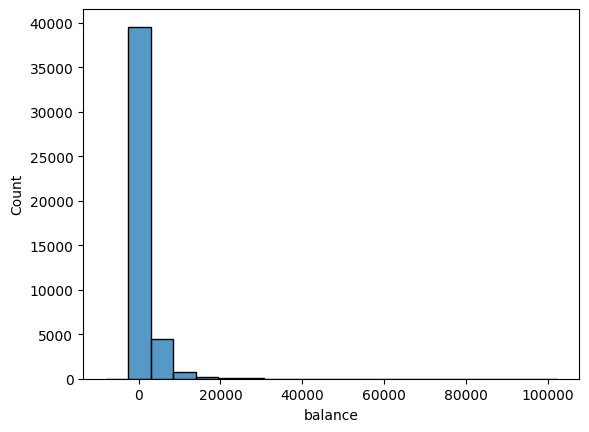

In [66]:
sns.histplot(data=df.balance,bins=20)

In [67]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [68]:
len(df[df["balance"]>4000])

3898

In [69]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson")
data_frame["balance_power_scaled"]=pt.fit_transform(data_frame[["balance"]])

<Axes: xlabel='balance_power_scaled', ylabel='Count'>

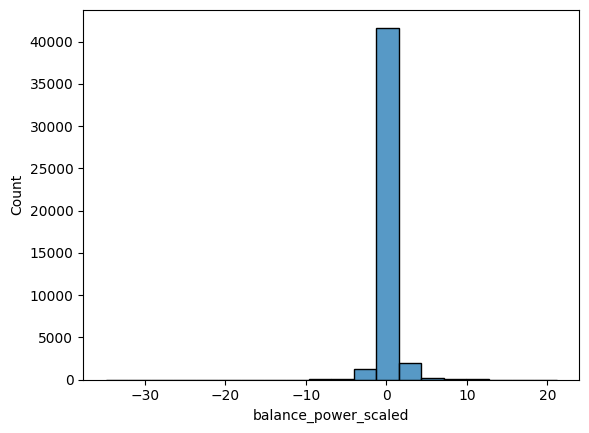

In [70]:
sns.histplot(data=data_frame.balance_power_scaled,bins=20)

In [71]:
cols=["balance"]
data_frame.drop(columns=cols,axis=1,inplace=True)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

random_state = 42

X = data_frame.drop(columns="y", axis=1)
y = data_frame["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2
)


cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    knn_model.fit(X_train_cv, y_train_cv)
    y_pred = knn_model.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (KNN):")
print(cv_results)
print("\nAverage Metrics:")
print(cv_results.mean())

Cross-Validation Results (KNN):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.842602   0.820423  0.877173  0.847850                12.282670
1  0.831480   0.808026  0.869508  0.837641                13.049168
2  0.844378   0.826742  0.871402  0.848485                12.859813
3  0.841387   0.820158  0.874579  0.846495                12.542056
4  0.841279   0.821674  0.871752  0.845972                12.824827

Average Metrics:
Accuracy                    0.840225
Precision                   0.819405
Recall                      0.872883
F1 Score                    0.845288
False Negative Rate (%)    12.711707
dtype: float64


<Axes: xlabel='day_of_week', ylabel='Count'>

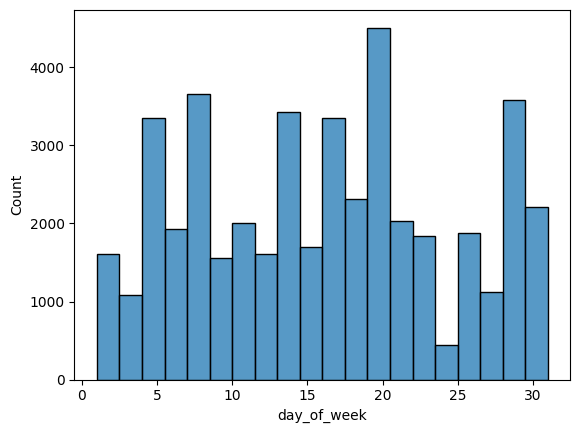

In [73]:
sns.histplot(data=data_frame,x="day_of_week",bins=20)

In [74]:
data_frame["credit_history"] = data_frame["loan_status"].astype(str) + "_" + df["default_status"].astype(str)
data_frame["credit_history"] = data_frame["credit_history"].map({"1_0": 1, "1_1": 1, "0_0": 0, "0_1": 0})
df1=data_frame.copy()
cols=["loan_status","default_status"]
df1.drop(columns=cols,axis=1,inplace=True)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

random_state = 42

X = data_frame.drop(columns="y", axis=1)
y = data_frame["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


knn_model = KNeighborsClassifier(
    n_neighbors=3,
    metric='minkowski',
    p=1
)


cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    knn_model.fit(X_train_cv, y_train_cv)
    y_pred = knn_model.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (KNN):")
print(cv_results)
print("\nAverage Metrics:")
print(cv_results.mean())

Cross-Validation Results (KNN):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.872979   0.849265  0.906898  0.877136                 9.310151
1  0.868773   0.844903  0.903346  0.873148                 9.665358
2  0.878961   0.854396  0.913645  0.883028                 8.635514
3  0.872792   0.850959  0.903925  0.876643                 9.607477
4  0.874556   0.850937  0.908207  0.878640                 9.179286

Average Metrics:
Accuracy                   0.873612
Precision                  0.850092
Recall                     0.907204
F1 Score                   0.877719
False Negative Rate (%)    9.279557
dtype: float64


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

random_state = 42

X = df1.drop(columns="y", axis=1)
y = df1["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


knn_model_1 = KNeighborsClassifier(
    n_neighbors=3,
    metric='minkowski',
    p=1
)


cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    knn_model.fit(X_train_cv, y_train_cv)
    y_pred = knn_model.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results_1 = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (KNN):")
print(cv_results_1)
print("\nAverage Metrics:")
print(cv_results_1.mean())

Cross-Validation Results (KNN):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.871577   0.846315  0.908020  0.876082                 9.197981
1  0.869240   0.843478  0.906712  0.873953                 9.328847
2  0.878961   0.855265  0.912336  0.882880                 8.766355
3  0.872698   0.851056  0.903551  0.876519                 9.644860
4  0.874743   0.850744  0.908955  0.878886                 9.104506

Average Metrics:
Accuracy                   0.873444
Precision                  0.849372
Recall                     0.907915
F1 Score                   0.877664
False Negative Rate (%)    9.208510
dtype: float64


In [77]:
y_proba=knn_model.predict_proba(X_test_cv)
max_probs=np.max(y_proba,axis=1) 

high_conf_mask=max_probs>=0.95


y_pred_high_conf=y_pred[high_conf_mask]
y_true_high_conf=y_test_cv.iloc[high_conf_mask]

print(f"%95+ Hig Confidence:{len(y_pred_high_conf)}")
print("F1 Score (95+ confident predictions):",f1_score(y_true_high_conf,y_pred_high_conf))


%95+ Hig Confidence:7886
F1 Score (95+ confident predictions): 0.9514947074560893


In [78]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       45211 non-null  int64  
 1   housing                   45211 non-null  int64  
 2   day_of_week               45211 non-null  int64  
 3   campaign                  45211 non-null  int64  
 4   pdays                     45211 non-null  int64  
 5   previous                  45211 non-null  int64  
 6   y                         45211 non-null  int64  
 7   poutcome_success          45211 non-null  int32  
 8   contacted                 45211 non-null  int64  
 9   loan_status               45211 non-null  int64  
 10  default_status            45211 non-null  int64  
 11  marital_status            45211 non-null  int64  
 12  education_target_encoded  45211 non-null  float64
 13  job_target_encoded        45211 non-null  float64
 14  season

<Axes: xlabel='previous', ylabel='Count'>

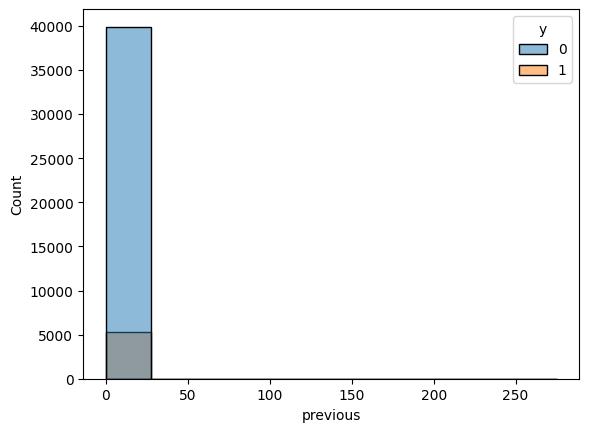

In [79]:
sns.histplot(data=data_frame,x="previous",hue="y",bins=10)

In [80]:
data_frame.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [81]:
len(data_frame[data_frame["previous"]>100])

1

In [82]:
len(data_frame[data_frame["previous"]>50])

4

In [83]:
len(data_frame[data_frame["previous"]>10])

294

In [84]:
len(data_frame[data_frame["previous"]==0])

36954

In [85]:
data_frame['previous_contact']=data_frame['previous'].apply(lambda x: '0' if x == 0 else '1')


In [86]:
data_frame.drop(columns="previous",axis=1,inplace=True)

In [87]:
data_frame

,age,housing,day_of_week,campaign,pdays,y,poutcome_success,contacted,loan_status,default_status,marital_status,education_target_encoded,job_target_encoded,season_fall,season_spring,season_summer,season_winter,balance_power_scaled,credit_history,previous_contact
0,58,1,5,1,-1,0,0,0,0,0,1,0.150064,0.137556,0,1,0,0,0.414773,0,0
1,44,1,5,1,-1,0,0,0,0,0,0,0.105594,0.110570,0,1,0,0,-0.410774,0,0
2,33,1,5,1,-1,0,0,0,1,0,1,0.105594,0.082717,0,1,0,0,-0.431122,1,0
3,47,1,5,1,-1,0,0,0,0,0,1,0.135703,0.072750,0,1,0,0,0.197685,0,0
4,33,1,5,1,-1,0,0,0,0,0,0,0.135703,0.118056,0,1,0,0,-0.432119,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,17,3,-1,1,0,1,0,0,1,0.150064,0.110570,1,0,0,0,-0.052398,0,0
45207,71,1,17,2,-1,1,0,1,0,0,0,0.086265,0.227915,1,0,0,0,0.275122,0,0
45208,72,1,17,5,184,1,1,1,0,0,1,0.105594,0.227915,1,0,0,0,1.495765,0,1
45209,57,1,17,4,-1,0,0,1,0,0,1,0.105594,0.072750,1,0,0,0,-0.114235,0,0


<Axes: xlabel='campaign', ylabel='Count'>

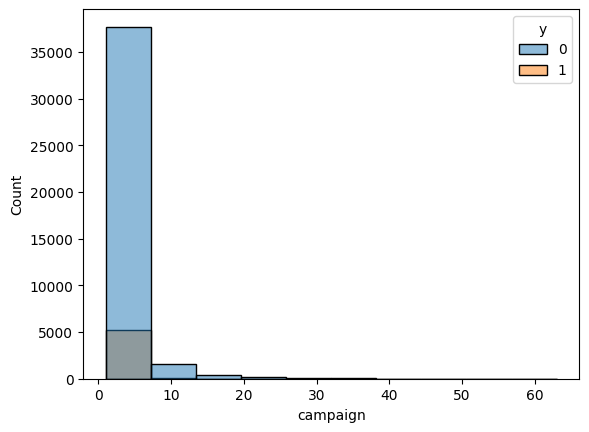

In [88]:
sns.histplot(data=data_frame,x="campaign",hue="y",bins=10)

In [89]:
data_frame.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [90]:
len(data_frame[data_frame["campaign"]>10])

1196

In [91]:
data_frame["campaign_category"]=data_frame["campaign"].apply(lambda x:"low_participation" if x <= 2 
                                               else ("medium_participation" if 3 <= x <= 5 
                                                     else ("high_participation" if 6 <= x <= 10 
                                                           else "very_high_participation")))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'low_participation'),
  Text(1, 0, 'medium_participation'),
  Text(2, 0, 'high_participation'),
  Text(3, 0, 'very_high_participation')])

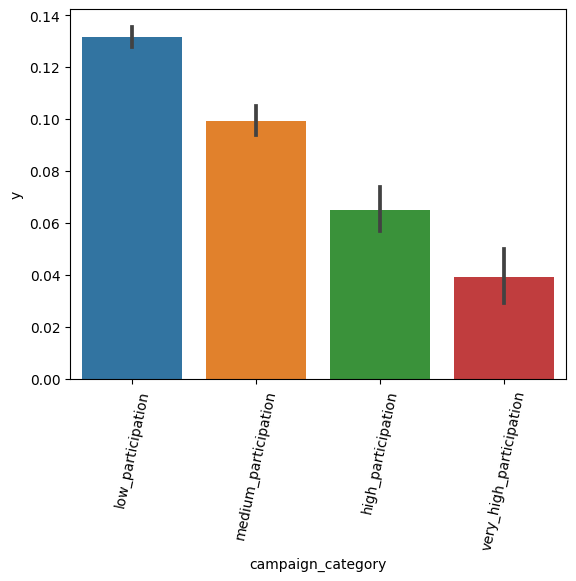

In [92]:
sns.barplot(data=data_frame,x="campaign_category",y="y")
plt.xticks(rotation=78)

In [93]:
data_frame.drop(columns="campaign",axis=1,inplace=True)

In [94]:
campaign_mapping={
    "low_participation": 0,
    "medium_participation": 1,
    "high_participation": 2,
    "very_high_participation": 3
}

data_frame["campaign_category"]=data_frame["campaign_category"].map(campaign_mapping)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

random_state = 42

X = data_frame.drop(columns="y", axis=1)
y = data_frame["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


knn_model = KNeighborsClassifier(
    n_neighbors=2,
    metric='minkowski',
    p=1
)


cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    knn_model.fit(X_train_cv, y_train_cv)
    y_pred = knn_model.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (KNN):")
print(cv_results)
print("\nAverage Metrics:")
print(cv_results.mean())

Cross-Validation Results (KNN):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.880456   0.916667  0.836979  0.875012                16.302113
1  0.869147   0.911611  0.817536  0.862015                18.246401
2  0.879521   0.917369  0.834206  0.873813                16.579439
3  0.876904   0.915345  0.830654  0.870946                16.934579
4  0.874836   0.914770  0.826697  0.868506                17.330342

Average Metrics:
Accuracy                    0.876173
Precision                   0.915152
Recall                      0.829214
F1 Score                    0.870058
False Negative Rate (%)    17.078575
dtype: float64


In [96]:
df_encoded=pd.get_dummies(data_frame,columns=["campaign_category"],prefix="campaign")


In [97]:
df_encoded

,age,housing,day_of_week,pdays,y,poutcome_success,contacted,loan_status,default_status,marital_status,...,season_spring,season_summer,season_winter,balance_power_scaled,credit_history,previous_contact,campaign_0,campaign_1,campaign_2,campaign_3
0,58,1,5,-1,0,0,0,0,0,1,...,1,0,0,0.414773,0,0,1,0,0,0
1,44,1,5,-1,0,0,0,0,0,0,...,1,0,0,-0.410774,0,0,1,0,0,0
2,33,1,5,-1,0,0,0,1,0,1,...,1,0,0,-0.431122,1,0,1,0,0,0
3,47,1,5,-1,0,0,0,0,0,1,...,1,0,0,0.197685,0,0,1,0,0,0
4,33,1,5,-1,0,0,0,0,0,0,...,1,0,0,-0.432119,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,17,-1,1,0,1,0,0,1,...,0,0,0,-0.052398,0,0,0,1,0,0
45207,71,1,17,-1,1,0,1,0,0,0,...,0,0,0,0.275122,0,0,1,0,0,0
45208,72,1,17,184,1,1,1,0,0,1,...,0,0,0,1.495765,0,1,0,1,0,0
45209,57,1,17,-1,0,0,1,0,0,1,...,0,0,0,-0.114235,0,0,0,1,0,0


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC

random_state = 42

X = df1.drop(columns="y", axis=1)
y = df1["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)



adasyn = ADASYN(sampling_strategy='auto', random_state=random_state)
#smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled,y_resampled=adasyn.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


rf_model_2 = RandomForestClassifier(
    n_estimators=24,      
    criterion='entropy',      
    max_depth=None,        
    random_state=42,
       min_samples_leaf=1)

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    rf_model_2.fit(X_train_cv, y_train_cv)
    y_pred = rf_model_2.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results_3 = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (RF):")
print(cv_results_3)
print("\nAverage Metrics:")
print(cv_results_3.mean())

Cross-Validation Results (RF):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.926263   0.952152  0.898022  0.924295                10.197802
1  0.926331   0.948805  0.901671  0.924637                 9.832943
2  0.925670   0.952938  0.895971  0.923576                10.402930
3  0.924495   0.950988  0.895531  0.922427                10.446886
4  0.926625   0.951348  0.899634  0.924768                10.036630

Average Metrics:
Accuracy                    0.925877
Precision                   0.951246
Recall                      0.898166
F1 Score                    0.923941
False Negative Rate (%)    10.183438
dtype: float64


In [99]:
y_proba=rf_model_2.predict_proba(X_test_cv)
max_probs=np.max(y_proba,axis=1) 

high_conf_mask=max_probs>=.9


y_pred_high_conf=y_pred[high_conf_mask]
y_true_high_conf=y_test_cv.iloc[high_conf_mask]

print(f"%95+ Hig Confidence:{len(y_pred_high_conf)}")
print("F1 Score (95+ confident predictions):",f1_score(y_true_high_conf,y_pred_high_conf))



%95+ Hig Confidence:8367
F1 Score (95+ confident predictions): 0.9886649874055415


In [100]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np


rf_model_0 = RandomForestClassifier(random_state=42)
rf_model_0.fit(X_train, y_train)


importances = rf_model_0.feature_importances_
features = X_train.columns


importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


threshold = 0.01  
selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)


y_pred = rf_model_selected.predict(X_test_selected)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                     Feature  Importance
15      balance_power_scaled    0.224453
0                        age    0.177176
2                day_of_week    0.161566
10        job_target_encoded    0.078216
6           poutcome_success    0.068572
4                      pdays    0.064778
3                   campaign    0.061434
9   education_target_encoded    0.035471
5                   previous    0.031401
8             marital_status    0.017243
7                  contacted    0.016199
13             season_summer    0.015782
12             season_spring    0.012879
16            credit_history    0.012643
11               season_fall    0.011591
14             season_winter    0.010594
1                    housing    0.000000
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5970
           1       0.61      0.21      0.31       812

    accuracy                           0.89      6782
   macro avg       0.76      0.59      0.62 

In [101]:
df1.drop(columns="housing",axis=1,inplace=True)

In [102]:
cols=["season_spring","credit_history","season_fall","season_winter"]
df1.drop(columns=cols,axis=1,inplace=True)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC

random_state = 42

X = df1.drop(columns="y", axis=1)
y = df1["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)



adasyn = ADASYN(sampling_strategy='auto', random_state=random_state)
#smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled,y_resampled=adasyn.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


rf_model_2 = RandomForestClassifier(
    n_estimators=13,      
    criterion='entropy',      
    max_depth=None,        
    random_state=42,
       min_samples_leaf=1)

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    rf_model_2.fit(X_train_cv, y_train_cv)
    y_pred = rf_model_2.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results_3 = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (RF):")
print(cv_results_3)
print("\nAverage Metrics:")
print(cv_results_3.mean())

Cross-Validation Results (RF):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.909311   0.923854  0.893149  0.908242                10.685131
1  0.912168   0.922778  0.900583  0.911546                 9.941691
2  0.909304   0.924622  0.892274  0.908160                10.772595
3  0.908132   0.920240  0.894752  0.907317                10.524781
4  0.911429   0.926748  0.894461  0.910318                10.553936

Average Metrics:
Accuracy                    0.910069
Precision                   0.923649
Recall                      0.895044
F1 Score                    0.909117
False Negative Rate (%)    10.495627
dtype: float64


In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       45211 non-null  int64  
 1   day_of_week               45211 non-null  int64  
 2   campaign                  45211 non-null  int64  
 3   pdays                     45211 non-null  int64  
 4   previous                  45211 non-null  int64  
 5   y                         45211 non-null  int64  
 6   poutcome_success          45211 non-null  int32  
 7   contacted                 45211 non-null  int64  
 8   marital_status            45211 non-null  int64  
 9   education_target_encoded  45211 non-null  float64
 10  job_target_encoded        45211 non-null  float64
 11  season_summer             45211 non-null  uint8  
 12  balance_power_scaled      45211 non-null  float64
dtypes: float64(3), int32(1), int64(8), uint8(1)
memory usage: 4.0

In [105]:
df1['campaign_high'] = np.where(df1['campaign'] > df1['campaign'].quantile(0.95), 1, 0)
df1['campaign_level'] = pd.cut(df1['campaign'],
                             bins=[-1, 2, 10, np.inf],
                             labels=['low', 'medium', 'high'])

In [106]:
df1

,age,day_of_week,campaign,pdays,previous,y,poutcome_success,contacted,marital_status,education_target_encoded,job_target_encoded,season_summer,balance_power_scaled,campaign_high,campaign_level
0,58,5,1,-1,0,0,0,0,1,0.150064,0.137556,0,0.414773,0,low
1,44,5,1,-1,0,0,0,0,0,0.105594,0.110570,0,-0.410774,0,low
2,33,5,1,-1,0,0,0,0,1,0.105594,0.082717,0,-0.431122,0,low
3,47,5,1,-1,0,0,0,0,1,0.135703,0.072750,0,0.197685,0,low
4,33,5,1,-1,0,0,0,0,0,0.135703,0.118056,0,-0.432119,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,3,-1,0,1,0,1,1,0.150064,0.110570,0,-0.052398,0,medium
45207,71,17,2,-1,0,1,0,1,0,0.086265,0.227915,0,0.275122,0,low
45208,72,17,5,184,3,1,1,1,1,0.105594,0.227915,0,1.495765,0,medium
45209,57,17,4,-1,0,0,0,1,1,0.105594,0.072750,0,-0.114235,0,medium


In [107]:
df1.drop(columns="campaign",axis=1,inplace=True)


In [108]:
df1['campaign_high'] = df1['campaign_level'].map({"low":0,"medium":1,"high":2})

In [109]:
df1.drop(columns="campaign_level",axis=1,inplace=True)

In [110]:
df1["campaign_high"]=df1["campaign_high"].astype(int)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC

random_state = 42

X = df1.drop(columns="y", axis=1)
y = df1["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=random_state)



adasyn = ADASYN(sampling_strategy='auto', random_state=random_state)
#smote = SMOTE(sampling_strategy='auto', random_state=random_state)
X_resampled,y_resampled=adasyn.fit_resample(X_train, y_train)

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X_resampled)


rf_model_2 =RandomForestClassifier(
    n_estimators=23,      
    criterion='entropy',      
    max_depth=None,        
    random_state=42,
       min_samples_leaf=1)

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


accuracies = []
precisions = []
recalls = []
f1_scores = []
false_negative_rates = []

for train_index, test_index in cross_val.split(X_scaled, y_resampled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    rf_model_2.fit(X_train_cv, y_train_cv)
    y_pred = rf_model_2.predict(X_test_cv)

 
    cm = confusion_matrix(y_test_cv, y_pred)
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]
    false_negative_rate = false_negative / (false_negative + true_positive) * 100


    accuracies.append(accuracy_score(y_test_cv, y_pred))
    precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
    recalls.append(recall_score(y_test_cv, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_cv, y_pred, zero_division=0))
    false_negative_rates.append(false_negative_rate)


cv_results_3 = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "False Negative Rate (%)": false_negative_rates
})

print("Cross-Validation Results (RF):")
print(cv_results_3)
print("\nAverage Metrics:")
print(cv_results_3.mean())

Cross-Validation Results (RF):
   Accuracy  Precision    Recall  F1 Score  False Negative Rate (%)
0  0.916443   0.928913  0.902899  0.915721                 9.710104
1  0.913966   0.927804  0.898818  0.913081                10.118210
2  0.916224   0.929255  0.902055  0.915453                 9.794540
3  0.917640   0.934729  0.898944  0.916487                10.105559
4  0.912828   0.929250  0.894722  0.911659                10.527797

Average Metrics:
Accuracy                    0.915420
Precision                   0.929990
Recall                      0.899488
F1 Score                    0.914480
False Negative Rate (%)    10.051242
dtype: float64
